In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 4.2: The Gaussian Distribution

## Objectives

+ To practice with the Gaussian distribution.

## The Normal distribution

The normal (or Gaussian) distribution is a ubiquitous one.
It appears over and over again.
There are two explanations as to why it appears so often:

+ It is the distribution of maximum uncertainty that matches a known mean and a known variance variance.
+ It is the distribution that arises when you add a lot of random variables together.

We will learn about both these in the next lectures.

We write:
$$
X | \mu, \sigma \sim N(\mu, \sigma),
$$
and we read "$X$ conditioned on $\mu$ and $\sigma$ follows a normal distribution with mean $\mu$ and variance $\sigma^2$.

When $\mu=0$ and $\sigma^2=1$, we say that we have a *standard normal* distribution.
Let
$$
Z\sim N(0,1).
$$
The PDF of the standard normal is:
$$
\phi(z) := N(z|0,1) = \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{z^2}{2}\right\}.
$$
The CDF of the standard normal is:
$$
\Phi(z) := p(Z \le z) = \int_{-\infty}^z \phi(z')dz',
$$
is not analytically available.
However, there are codes that can compute it.

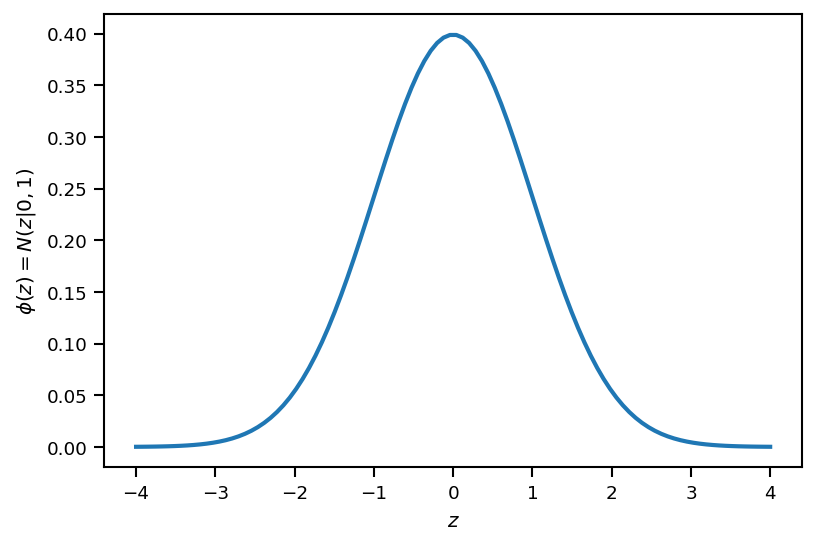

In [2]:
import scipy.stats as st

# Here is how you can get the PDF of the standard normal
Z = st.norm()
fig, ax = plt.subplots(dpi=150)
zs = np.linspace(-4.0, 4.0, 100)
ax.plot(zs, Z.pdf(zs), lw=2)
ax.set_xlabel('$z$')
ax.set_ylabel('$\phi(z) = N(z|0,1)$');

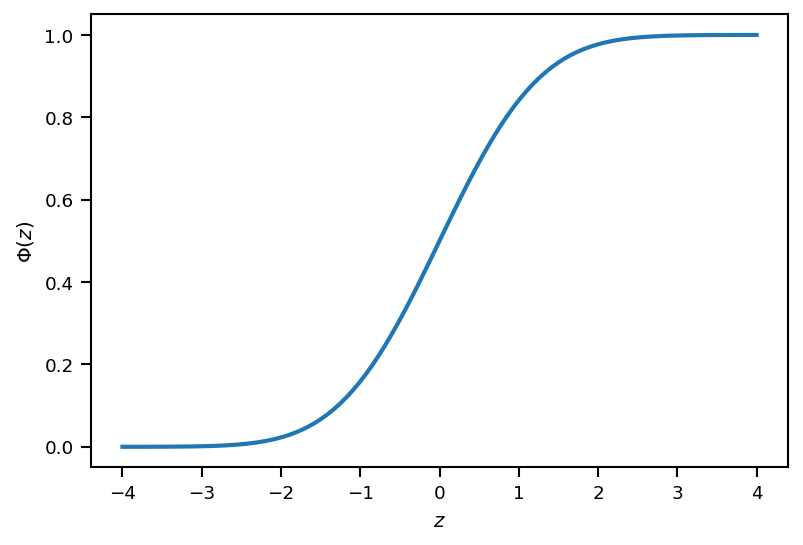

In [3]:
# And here is the CDF of the standard normal
fig, ax = plt.subplots(dpi=150)
ax.plot(zs, Z.cdf(zs), lw=2)
ax.set_xlabel('$z$')
ax.set_ylabel('$\Phi(z)$');

In [4]:
# Here is the expectation:
print('E[Z] = {0:1.2f}'.format(Z.expect()))

E[Z] = 0.00


In [5]:
# Here is the variance:
print('V[Z] = {0:1.2f}'.format(Z.var()))

V[Z] = 1.00


In [6]:
# Here is the probability that Z is between two numbers
a = 1.0
b = 3.0
prob_Z_in_ab = Z.cdf(b) - Z.cdf(a)
print('p({0:1.2f} <= Z <= {1:1.2f}) = {2:1.2f}'.format(a, b, prob_Z_in_ab))

p(1.00 <= Z <= 3.00) = 0.16


In [7]:
# And here is how you can sample
Z.rvs(100)

array([-0.29192897, -1.36679846, -1.41039653,  0.707996  ,  0.15839126,
        1.10453129,  1.5020008 ,  0.22743828,  1.95063438,  1.74592367,
       -1.05033992,  0.30938022,  2.14885902, -0.58216055, -0.17420595,
        0.01331482, -0.90370962,  0.37047713, -0.3539446 ,  1.3304492 ,
        0.46606181, -1.27027809,  0.33994286,  1.5439151 , -0.35734681,
        0.07425958, -1.02227963, -0.63939792,  1.27642819, -0.38944854,
       -0.7210227 , -1.08757662, -0.04809117,  0.5844993 , -1.1759045 ,
        1.21053945, -0.09971102, -0.94086081,  3.11533591, -0.62239611,
        0.75587279,  0.71186121, -0.64204379,  0.50839952,  1.04817959,
       -1.09771124,  0.12752365, -0.6215259 , -0.80453873,  1.40009227,
       -0.32272952,  1.05779849,  0.90604946, -0.87347455, -1.0723782 ,
       -0.42137998, -1.96812641,  0.00434584,  0.76372257,  0.88369014,
        1.2531    ,  0.47601494, -0.11070907,  1.59736017, -1.07537119,
       -0.97307778, -2.90642854, -0.62743383,  0.93455196,  0.70

In [8]:
# And, of course, you can also sample using the functionality of numpy:
np.random.randn(100)

array([ 3.13383950e-01,  4.14939783e-01, -4.48355185e-01, -9.81925437e-02,
        5.61346055e-01, -8.98974415e-01,  2.83374559e-01,  5.41612490e-01,
        1.57011281e+00, -4.76602043e-01,  1.04870889e+00,  9.68054818e-01,
       -1.67990829e-01, -2.93452161e+00,  1.85502206e+00,  1.42075124e-01,
        2.28374663e-01,  4.68298124e-01, -4.47470000e-01, -2.63703157e-01,
        3.20588197e-01, -4.76959435e-01,  1.40976028e+00,  1.36973127e+00,
       -4.28434327e-01,  8.69442457e-01, -9.25119251e-01, -2.46785396e+00,
        3.19521867e-01,  1.00972417e-02, -9.65928183e-01,  2.16468750e-01,
       -9.30479248e-01, -1.54070243e+00, -6.81852131e-01, -4.58578745e-02,
        1.28312583e-01, -7.08124274e-01,  1.66227753e+00, -1.00600561e+00,
        2.39574034e+00,  4.73304067e-01,  8.08392341e-01, -6.94106848e-01,
        6.85163611e-01, -8.96850579e-01,  2.94378874e+00,  2.01017587e+00,
       -1.43434490e+00,  6.47408779e-02,  1.23819009e-01, -7.65714025e-01,
       -4.13905154e-02, -

There are a few more interesting things to know about the standard normal.
For, example how can you find a value $z_q$ such that the probability of $Z$ being less that $z_q$ is $q$\%.
Mathematically, you wish to find this:
$$
\Phi(z_q) = \frac{q}{100}.
$$
The point $z_q$ is called the $q$\% quantile.
To find it, you need to do this:
$$
z_q = \Phi^{-1}\left(\frac{q}{100}\right).
$$
For example, $z_{50}$ is called the median (and it coincides with the expectation here).
Another set of interesting quantiles is are $z_{2.5}$ and $z_{97.5}$.
Why? Because the probability between them is $95$\%.
Here it is:
$$
p(z_{2.5} \le Z \le z_{97.5}) = \Phi(z_{97.5}) - \Phi(z_{2.5}) = \frac{97.5}{100} - \frac{2.5}{100} = \frac{95}{100}.
$$
Let's find these quantiles and visualize them using the functionality of ``scipy.stats``.

In [9]:
z_025 = Z.ppf(0.025) # ppf = percent point function and it is essentially the inverse of the CDF
z_500 = Z.ppf(0.5)
z_975 = Z.ppf(0.975)
print('2.5% quantile of Z = {0:1.2f}'.format(z_025))
print('50% quantile of Z = {0:1.2f}'.format(z_500))
print('97.5% quantile of Z = {0:1.2f}'.format(z_975))

2.5% quantile of Z = -1.96
50% quantile of Z = 0.00
97.5% quantile of Z = 1.96


In [10]:
# Here is how much probability there is between the two extreme quantiles:
print('p({0:1.2f} <= Z <= {1:1.2f}) = {2:1.2f}'.format(z_025, z_975, Z.cdf(z_975) - Z.cdf(z_025)))

p(-1.96 <= Z <= 1.96) = 0.95


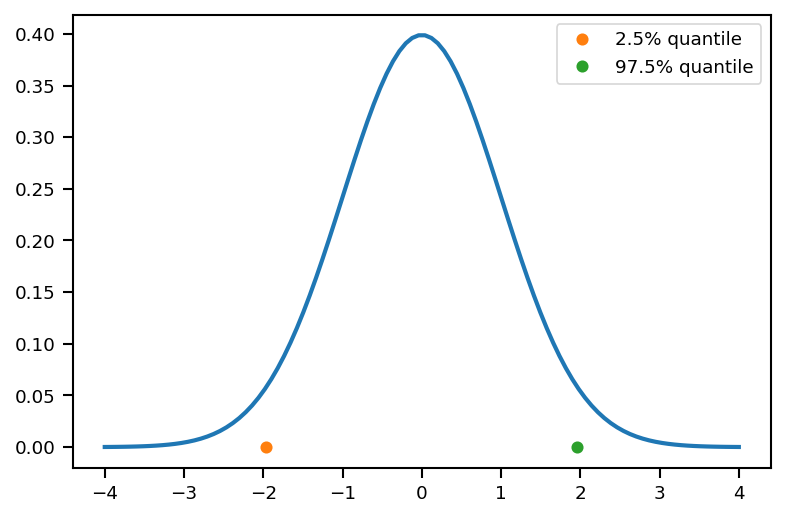

In [11]:
# Let's also visualize the quantiles with the function
fig, ax = plt.subplots(dpi=150)
ax.plot(zs, Z.pdf(zs), lw=2)
ax.plot(z_025, [0.0], 'o', label='2.5% quantile')
ax.plot(z_975, [0.0], 'o', label='97.5% quantile')
plt.legend(loc='best')

## Question

+ Modify the code above so that you find and vizualize $z_{0.001}$ and $z_{99.999}$.
+ What is the difference between $z_{99.999}$ and $z_{0.001}$?
+ What is the probability that $Z$ is between $z_{99.999}$ and $z_{0.001}$?

## Getting any normal from the standard normal
Using the standard normal, we can express any normal.
It is easy to show that:
$$
X = \mu + \sigma Z,
$$
follows a $N(\mu,\sigma^2)$ if $Z$ follows $N(0,1)$.
Note that $\sigma$ is called the **standard deviation** of $X$ (the standard deviation of a random variable is just the square root of the variance).
You must remember this!
It is extremely useful and it will appear again and again.
For example, using this relationship you can sample from any normal using samples from the standard normal.
Let's take some samples exploiting this relationship and then compare the histogram to the true PDF.

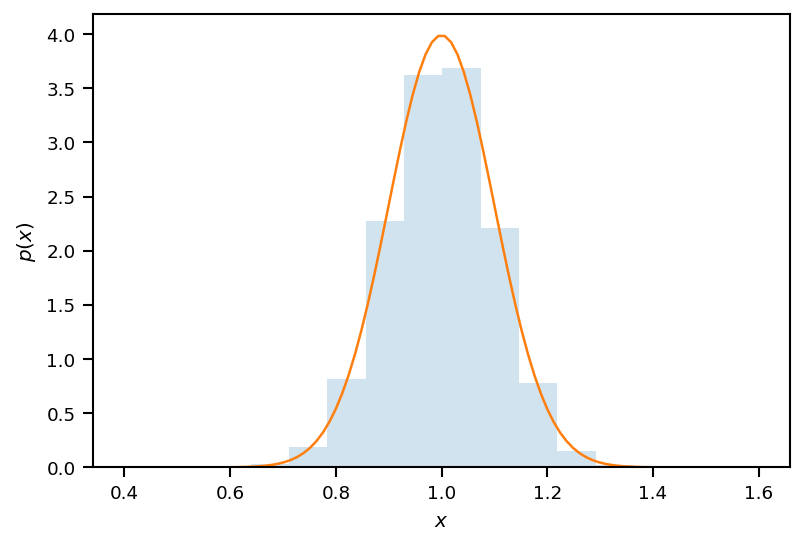

In [13]:
mu = 1.0
sigma = 0.1
X = st.norm(mu, sigma)
xs = np.linspace(mu - 6.0 * sigma, mu + 6.0 * sigma, 100)
x_samples = mu + sigma * Z.rvs(size=10000)
fig, ax = plt.subplots(dpi=150)
ax.hist(x_samples, density=True, alpha=0.5)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

How can you find the quantiles of this normal? Well, you can simply use the functionality of ``scipy.stats``.
As an example, let's find $x_{2.5}$:

In [14]:
x_025 = X.ppf(0.025)
print('2.5% quantile of N({0:1.2f}, {1:1.2f}^2) = {2:1.2f}'.format(mu, sigma, x_025))

2.5% quantile of N(1.00, 0.10^2) = 0.80


But we can also find this quantile by exploiting the connection between $X$ and $Z$.
The definition of a quantile of $X$ is:
$$
p(X \le x_q) = \frac{q}{100}.
$$
But, since $X=\mu+\sigma Z$, this is equivalent to:
$$
p(\mu + \sigma Z \le x_q) = \frac{q}{100},
$$
which becomes:
$$
p(\sigma Z \le x_q-\mu) = \frac{q}{100},
$$
and then:
$$
p\left(Z \le \frac{x_q-\mu}{\sigma}\right) = \frac{q}{100}.
$$
This is just:
$$
\Phi\left(\frac{x_q-\mu}{\sigma}\right) = \frac{q}{100},
$$
which tells us that $\frac{x_q-\mu}{\sigma}$ is the $q$-quantile of $Z$, i.e.,
$$
z_q = \frac{x_q-\mu}{\sigma}.
$$
Solving for $x_q$, we get:
$$
x_q = \mu + \sigma z_q.
$$
Let's do a sanity check:

In [15]:
z_025 = Z.ppf(0.025)
print('mu + sigma * z_025 = {0:1.2f}'.format(mu + sigma * z_025))

mu + sigma * z_025 = 0.80


which is the same as what we found before. So, let's find also the 97.5% quantile:

In [16]:
z_975 = Z.ppf(0.975)
x_975 = mu + sigma * z_975
print('97.5% quantile of N({0:1.2f}, {1:1.2f}^2) = {2:1.2f}'.format(mu, sigma, x_975))

97.5% quantile of N(1.00, 0.10^2) = 1.20


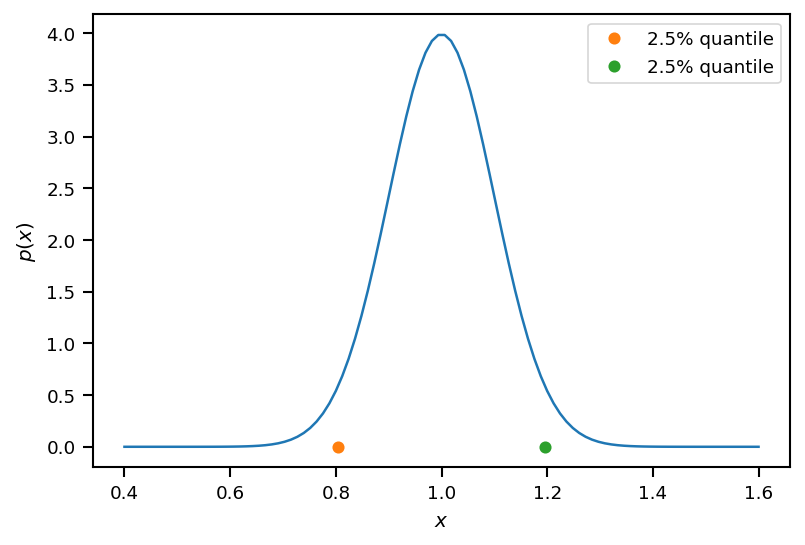

In [17]:
# Let's visualize the quantiles like we did before:
fig, ax = plt.subplots(dpi=150)
ax.plot(xs, X.pdf(xs))
ax.plot(x_025, 0, 'o', label='2.5% quantile')
ax.plot(x_975, 0, 'o', label='2.5% quantile')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.legend(loc='best');

Now, let's find the distance between $x_{2.5}$ and $x_{97.5}$ in terms of the standard deviation $\sigma$.
We have:
$$
x_{97.5} - x_{2.5} = \mu + \sigma z_{97.5} - \mu - \sigma z_{2.5} = \sigma (z_{97.5} - z_{2.5}).
$$
This is:

In [18]:
print('x_975 - x_025 ~= sigma * {0:1.2f}'.format(z_975 - z_025))

x_975 - x_025 ~= sigma * 3.92


Okay. So we see that 95% of the probability is contained within a $3.92\sigma$ interval.
This interval is centered at the median (which here happends to be the same as the mode and the expectation of the probability density).
The value 3.92 is a little bit awkward, so we are going to round up to 4$\sigma$ intervals.
That is slightly more than 95% of the probability, but it's simpler to remember.
So, remember:
$$
p(\mu - 2\sigma < X < \mu + 2 \sigma) \approx 0.95,
$$
for a normal random variable $N(\mu,\sigma^2)$.

## Questions

+ Write code that finds exactly how much probability there is between $\mu - 2\sigma$ and $\mu + 2\sigma$, i.e., find $p(\mu - 2\sigma < X < \mu + 2 \sigma)$.
+ Modify the code you just written, to find how much probability there is in $\mu - 3\sigma$ and $\mu + 3\sigma$, i.e., find $p(\mu - 3\sigma < X < \mu + 3 \sigma)$. This is six-sigmas interval about the mean. Have you ever heard of the [six-sigma process improvement technique](https://en.wikipedia.org/wiki/Six_Sigma)?